<a href="https://colab.research.google.com/github/tuananh1006/DS106_Optimization/blob/main/LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualize

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import meshgrid

In [311]:
def plot_curve(x,y):
  plt.plot(x,y)
def plot_plane(x,y,objective_function,r_min,r_max,diff,optimal_value=None):
  Xaxis=np.arange(r_min,r_max,diff)
  yaxis=np.arange(r_min,r_max,diff)
  Xgrid,ygrid=meshgrid(Xaxis,yaxis)
  z=objective_function(Xgrid,ygrid)
  plt.contourf(Xgrid,ygrid,z,50,alpha=1.0,cmap='jet')
  check_optimal=False
  if optimal_value:
    X_best_candidate_solution,y_best_candidate_solution,best_eval=optimal_value
    plt.plot(X_best_candidate_solution,y_best_candidate_solution,'*',color='white')
    check_optimal=True
  fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
  ax.plot_surface(Xgrid,ygrid,z,cmap='jet',alpha=0.7)
  if check_optimal==True:
    zmin, zmax = ax.get_zlim()
    ax.plot([X_best_candidate_solution, X_best_candidate_solution],
          [y_best_candidate_solution, y_best_candidate_solution],
          [zmin,zmax],  # Use z_values instead of a single z-coordinate
          color='red', marker='o')  # Plot as a red dot


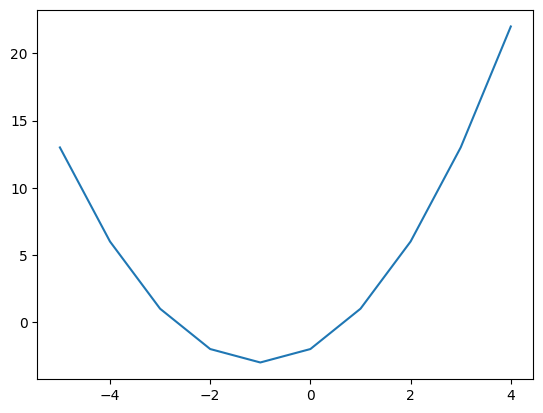

In [294]:
#a y=x^2+2x-2
def objective_function1(x):
  y=x*x+2*x-2
  return y
#x=1 ->y=1+2*1-2=1
#x=2 ->y=2*2+2*2-2=6
X=np.arange(-5,5,1)
y=objective_function1(X)
plot_curve(X,y)

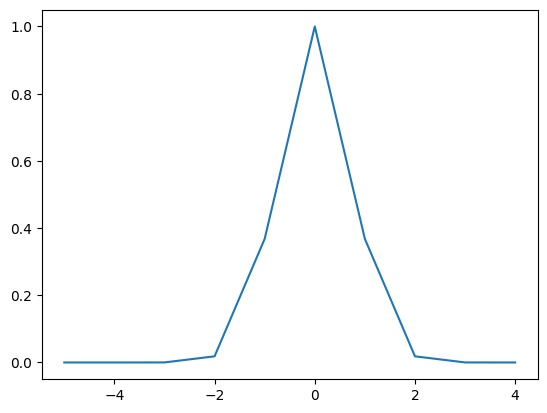

In [295]:
#b y=e^-x^2
def objective_function2(x):
  y=np.exp(-x*x)
  return y
#x=1 ->y=1+2*1-2=1
#x=2 ->y=2*2+2*2-2=6
X=np.arange(-5,5,1)
y=objective_function2(X)
plot_curve(X,y)

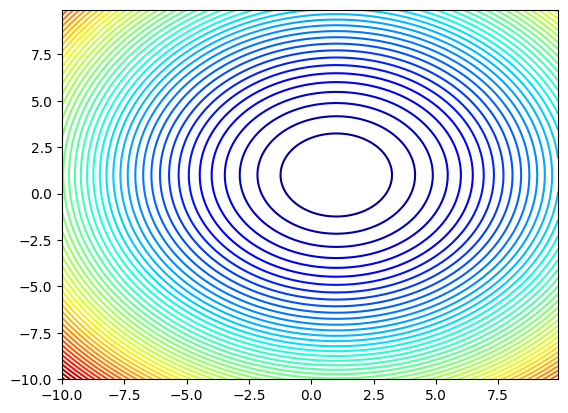

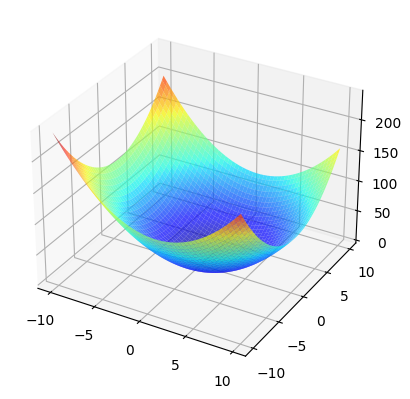

In [296]:
#c z=(x-1)^2+(y-1)^2
def objective_function3(x,y):
  z=(x-1)**2+(y-1)**2
  return np.array(z)

x=np.arange(-5,5,1)
y=np.arange(-5,5,1)
plot_plane(x,y,objective_function3,r_min=-10,r_max=10,diff=0.1)


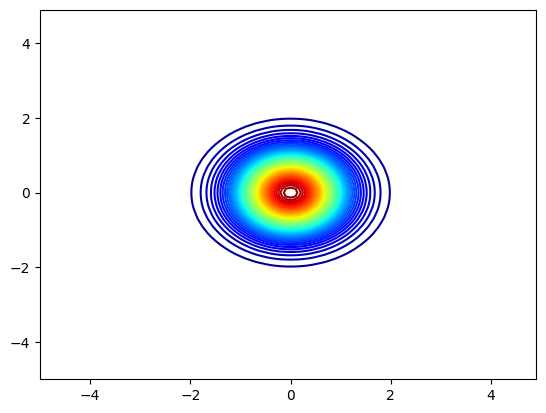

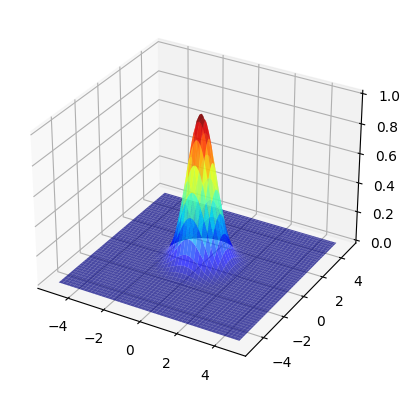

In [297]:
#d y=e^(-x^2+y^2)
def objective_function4(x,y):
  z=np.exp(-(x*x+y*y))
  return np.array(z)

x=np.arange(-5,5,1)
y=np.arange(-5,5,1)
plot_plane(x,y,objective_function4,r_min=-5,r_max=5,diff=0.1)


# Use Random Search and Grid Search to Search Optimal Points

#### Random Search

In [300]:
def random_search(r_min,r_max,objective_funciton,num_points,convex=True):
  candidate_solution=r_min+(r_max-r_min)*np.random.rand(num_points)
  sample_eval=objective_funciton(candidate_solution)
  if convex==True:
    best_candidate_solution=candidate_solution[np.argmin(sample_eval)]
  else:
    best_candidate_solution=candidate_solution[np.argmax(sample_eval)]
  return best_candidate_solution

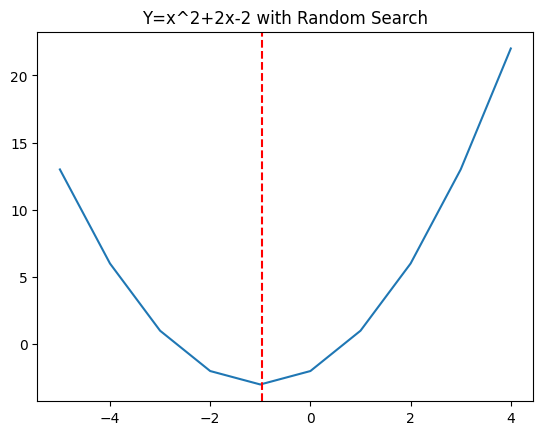

In [302]:
#Random Search
X=np.arange(-5,5,1)
y=objective_function1(X)
best_candidate_solution=random_search(-5,5,objective_function1,num_points=100,convex=True)
plot_curve(X,y)
plt.axvline(x=best_candidate_solution,color='r',ls='--')
plt.title('Y=x^2+2x-2 with Random Search')
plt.show()

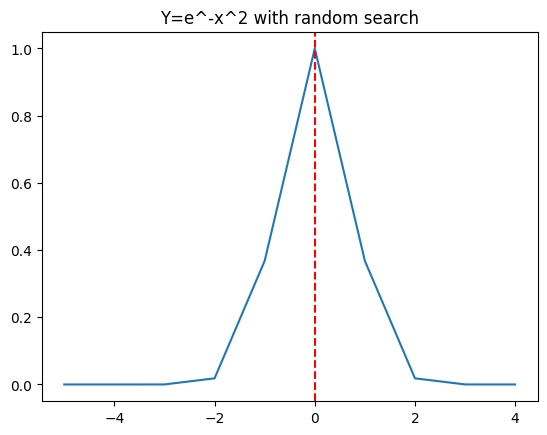

In [304]:
#Random Search
X=np.arange(-5,5,1)
y=objective_function2(X)
best_candidate_solution=random_search(-5,5,objective_function2,num_points=100,convex=False)
plot_curve(X,y)
plt.axvline(x=best_candidate_solution,color='r',ls='--')
plt.title('Y=e^-x^2 with random search')
plt.show()

In [327]:
def random_search_multi_dimension(r_min,r_max,objective_funciton,num_points,convex=True):
  best_eval = float('inf') if convex==True else float('-inf')  # Initialize with positive infinity
  x_values = r_min+(r_max-r_min)*np.random.rand(num_points)
  y_values = r_min+(r_max-r_min)*np.random.rand(num_points)
  for x in x_values:
      for y in y_values:
          sample_eval = objective_funciton(x, y)
          if convex==True:
            if sample_eval < best_eval:
                best_eval = sample_eval
                best_candidate_solution = (x, y)
          else:
            if sample_eval > best_eval:
                best_eval = sample_eval
                best_candidate_solution = (x, y)
  return best_candidate_solution[0],best_candidate_solution[1],best_eval

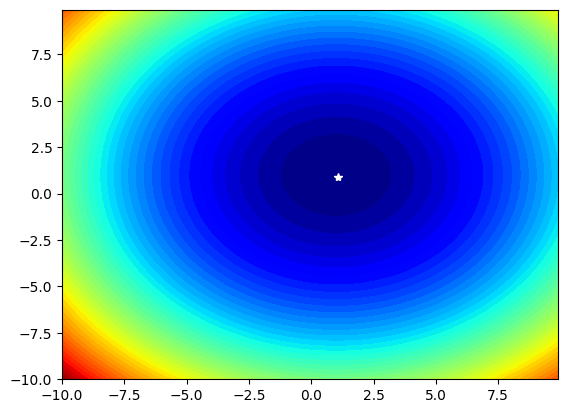

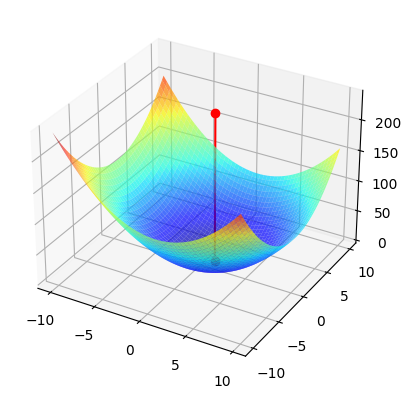

In [328]:
#Random Search
best_candidate_solution=random_search_multi_dimension(-5,5,objective_function3,num_points=100,convex=True)
plot_plane(x,y,objective_function3,r_min=-10,r_max=10,diff=0.1,optimal_value=best_candidate_solution)



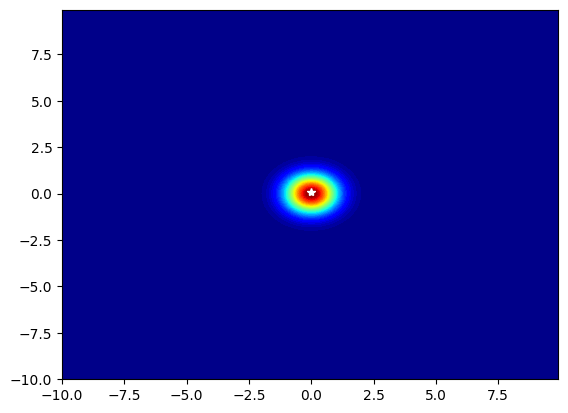

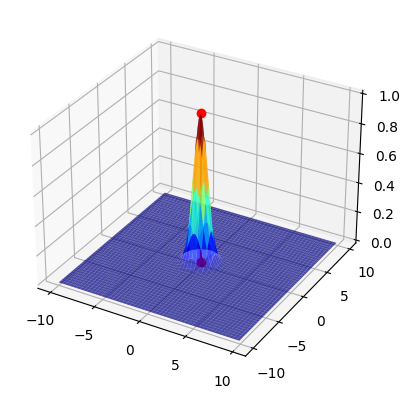

In [329]:
#Random Search
best_candidate_solution=random_search_multi_dimension(-5,5,objective_function4,num_points=100,convex=False)
plot_plane(x,y,objective_function4,r_min=-10,r_max=10,diff=0.1,optimal_value=best_candidate_solution)



#### Grid Search

In [323]:
def grid_search(r_min,r_max,objective_funciton,step,convex=True):
  candidate_solution=np.arange(r_min,r_max,step)
  sample_eval=objective_funciton(candidate_solution)
  if convex==True:
    best_candidate_solution=candidate_solution[np.argmin(sample_eval)]
  else:
    best_candidate_solution=candidate_solution[np.argmax(sample_eval)]
  return best_candidate_solution

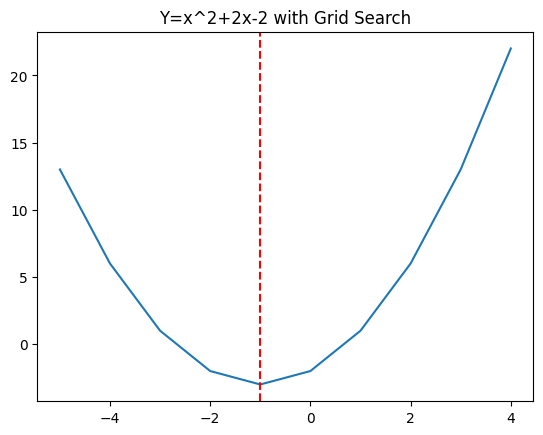

In [324]:
#Grid Search
X=np.arange(-5,5,1)
y=objective_function1(X)
best_candidate_solution=grid_search(-5,5,objective_function1,step=0.1,convex=True)
plot_curve(X,y)
plt.axvline(x=best_candidate_solution,color='r',ls='--')
plt.title('Y=x^2+2x-2 with Grid Search')
plt.show()

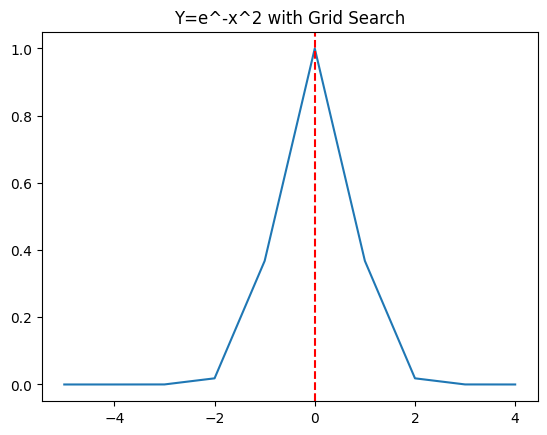

In [325]:
#Grid Search
X=np.arange(-5,5,1)
y=objective_function2(X)
best_candidate_solution=grid_search(-5,5,objective_function2,step=0.1,convex=False)
plot_curve(X,y)
plt.axvline(x=best_candidate_solution,color='r',ls='--')
plt.title('Y=e^-x^2 with Grid Search')
plt.show()

In [331]:
def grid_search_multi_dimension(r_min,r_max,objective_funciton,step=1,convex=True):
  best_eval = float('inf') if convex==True else float('-inf')  # Initialize with positive infinity
  x_values = np.arange(r_min, r_max, step)
  y_values = np.arange(r_min, r_max, step)
  for x in x_values:
      for y in y_values:
          sample_eval = objective_funciton(x, y)
          if convex==True:
            if sample_eval < best_eval:
                best_eval = sample_eval
                best_candidate_solution = (x, y)
          else:
            if sample_eval > best_eval:
                best_eval = sample_eval
                best_candidate_solution = (x, y)
  return best_candidate_solution[0],best_candidate_solution[1],best_eval

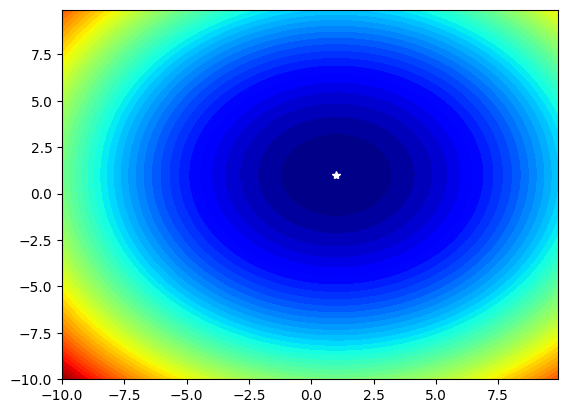

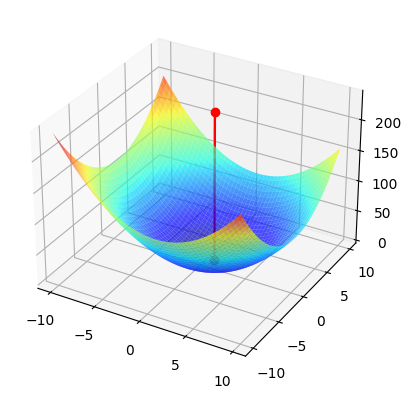

In [333]:
best_candidate_solution=grid_search_multi_dimension(-5,5,objective_function3,step=1,convex=True)
plot_plane(x,y,objective_function3,r_min=-10,r_max=10,diff=0.1,optimal_value=best_candidate_solution)

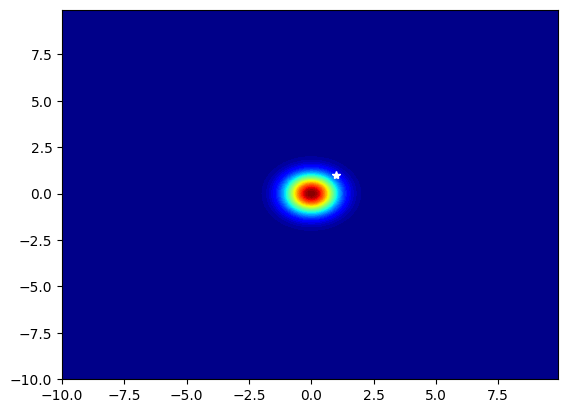

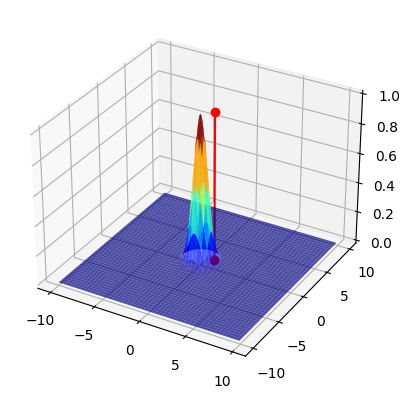

In [336]:
best_candidate_solution=grid_search_multi_dimension(-5,5,objective_function4,step=3,convex=False)
plot_plane(x,y,objective_function4,r_min=-10,r_max=10,diff=0.1,optimal_value=best_candidate_solution)